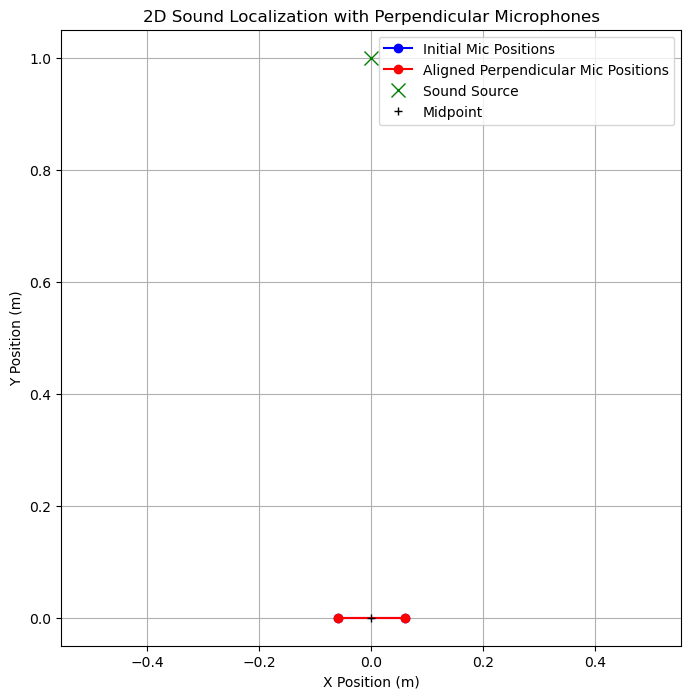

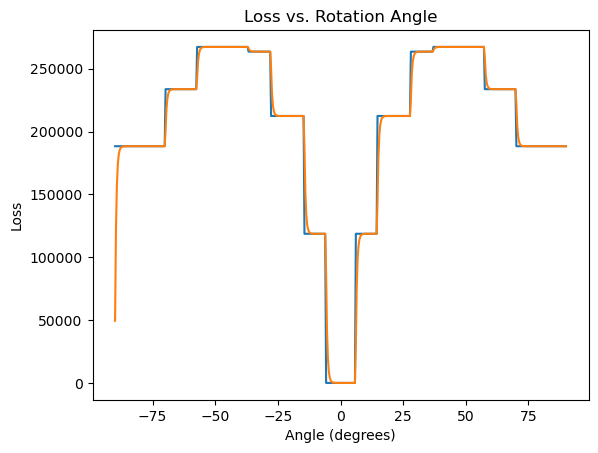

Rotated Microphone Positions (Perpendicular):
Mic 1: [0.06 0.  ]
Mic 2: [-0.06  0.  ]


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from IPython.display import Audio
from scipy import signal

# Microphone positions
mic1_initial = np.array([-0.06, 0])   # Mic 1 at [-1, 0]
mic2_initial = np.array([0.06, 0])    # Mic 2 at [1, 0]
mic_distance = np.linalg.norm(mic2_initial - mic1_initial)  # Distance between microphones
midpoint = (mic1_initial + mic2_initial) / 2  # Midpoint between mic 1 and mic 2

# Sound source position
sound_source = np.array([0, 1])  # Initial sound source position for alignment

# Angle from midpoint to sound source

angle_diff = -np.arctan2(sound_source[0] - midpoint[0], sound_source[1] - midpoint[1])


# Function to rotate microphones and calculate alignment loss
def mic_rotation(angle_to_rotate, sound_source, midpoint):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])

    return mic1_rotated, mic2_rotated

mic1_rotated, mic2_rotated = mic_rotation(angle_diff, sound_source, midpoint)
# Plotting the initial and aligned microphone positions
plt.figure(figsize=(8, 8))
plt.plot([mic1_initial[0], mic2_initial[0]], [mic1_initial[1], mic2_initial[1]], 'bo-', label="Initial Mic Positions")
plt.plot([mic1_rotated[0], mic2_rotated[0]], [mic1_rotated[1], mic2_rotated[1]], 'ro-', label="Aligned Perpendicular Mic Positions")
plt.plot(sound_source[0], sound_source[1], 'gx', label="Sound Source", markersize=10)
plt.plot(midpoint[0], midpoint[1], 'k+', label="Midpoint")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("2D Sound Localization with Perpendicular Microphones")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

folder_path = r'Bird_sound'
filename = "call1 (2).wav"
file_path = os.path.join(folder_path, filename)

SR, y = wavfile.read(file_path)
display(Audio(y, rate=SR))

# Constants for loss calculation
SOUND_SPEED = 343.2
  # Updated sound source position
y1_all = []
y2_all = []
# Loss calculation function for a range of angles
def loss_angle(angle_to_rotate):
    mic1_rotated, mic2_rotated = mic_rotation(angle_to_rotate, sound_source, midpoint)

    dist_to_mic1 = np.linalg.norm(sound_source - mic1_rotated)
    dist_to_mic2 = np.linalg.norm(sound_source - mic2_rotated)
    
    t_to_mic1 = dist_to_mic1 / SOUND_SPEED
    t_to_mic2 = dist_to_mic2 / SOUND_SPEED
    
    samples_at_mic1 = int(t_to_mic1 * SR)
    samples_at_mic2 = int(t_to_mic2 * SR)
    
    y1 = y[samples_at_mic1:-samples_at_mic2]
    y2 = y[samples_at_mic2:-samples_at_mic1]

    sos = signal.butter(1, 500, 'lp', fs=SR, output='sos')
    y1 = signal.sosfilt(sos, y1)
    y2 = signal.sosfilt(sos, y2)

    y1_all.append(y1)
    y2_all.append(y2)
    
    # Calculate the loss
    loss = np.linalg.norm(y1 - y2)
    return loss

# Calculate and plot loss for a range of angles
angles = np.linspace(-np.pi/2, np.pi/2, 501)
losses = np.array([loss_angle(a) for a in angles])


sos = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
sig = signal.sosfilt(sos, losses)

plt.figure()
plt.plot(np.degrees(angles), losses)
plt.plot(np.degrees(angles), sig)
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle")
plt.show()

# Display the final rotated microphone positions
print("Rotated Microphone Positions (Perpendicular):")
print("Mic 1:", mic1_rotated)
print("Mic 2:", mic2_rotated)



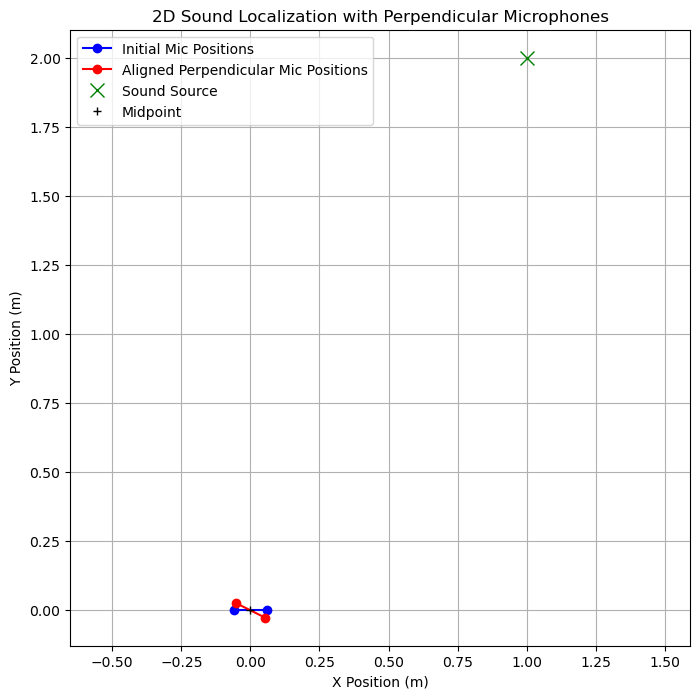

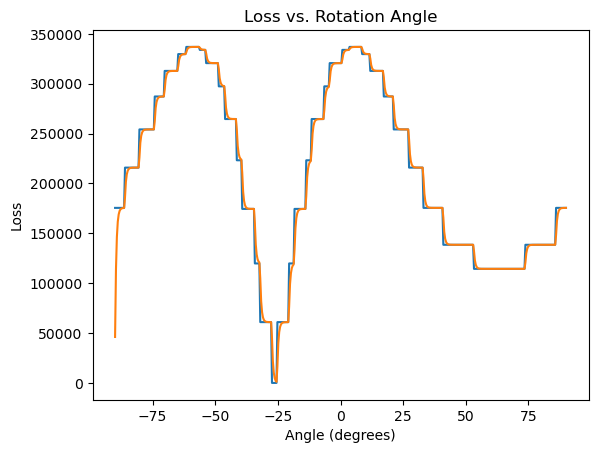

Rotated Microphone Positions (Perpendicular):
Mic 1: [ 0.05366563 -0.02683282]
Mic 2: [-0.05366563  0.02683282]


In [16]:
# Microphone positions
mic1_initial = np.array([-0.06, 0])   # Mic 1 at [-1, 0]
mic2_initial = np.array([0.06, 0])    # Mic 2 at [1, 0]
mic_distance = np.linalg.norm(mic2_initial - mic1_initial)  # Distance between microphones
midpoint = (mic1_initial + mic2_initial) / 2  # Midpoint between mic 1 and mic 2

# Angle from midpoint to sound source

angle_diff = -np.arctan2(sound_source[0] - midpoint[0], sound_source[1] - midpoint[1])


# Function to rotate microphones and calculate alignment loss
def mic_rotation(angle_to_rotate, sound_source, midpoint):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])

    return mic1_rotated, mic2_rotated

mic1_rotated, mic2_rotated = mic_rotation(angle_diff, sound_source, midpoint)
# Plotting the initial and aligned microphone positions
plt.figure(figsize=(8, 8))
plt.plot([mic1_initial[0], mic2_initial[0]], [mic1_initial[1], mic2_initial[1]], 'bo-', label="Initial Mic Positions")
plt.plot([mic1_rotated[0], mic2_rotated[0]], [mic1_rotated[1], mic2_rotated[1]], 'ro-', label="Aligned Perpendicular Mic Positions")
plt.plot(sound_source[0], sound_source[1], 'gx', label="Sound Source", markersize=10)
plt.plot(midpoint[0], midpoint[1], 'k+', label="Midpoint")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("2D Sound Localization with Perpendicular Microphones")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

sound_source = np.array([1, 2])

folder_path = r'Bird_sound'
filename = "call1.wav"
file_path = os.path.join(folder_path, filename)

SR, y = wavfile.read(file_path)
display(Audio(y, rate=SR))

# Constants for loss calculation
SOUND_SPEED = 343.2
  # Updated sound source position
y1_all = []
y2_all = []
# Loss calculation function for a range of angles
def loss_angle(angle_to_rotate):
    mic1_rotated, mic2_rotated = mic_rotation(angle_to_rotate, sound_source, midpoint)

    dist_to_mic1 = np.linalg.norm(sound_source - mic1_rotated)
    dist_to_mic2 = np.linalg.norm(sound_source - mic2_rotated)
    
    t_to_mic1 = dist_to_mic1 / SOUND_SPEED
    t_to_mic2 = dist_to_mic2 / SOUND_SPEED
    
    samples_at_mic1 = int(t_to_mic1 * SR)
    samples_at_mic2 = int(t_to_mic2 * SR)
    
    y1 = y[samples_at_mic1:-samples_at_mic2]
    y2 = y[samples_at_mic2:-samples_at_mic1]

    sos = signal.butter(1, 500, 'lp', fs=SR, output='sos')
    y1 = signal.sosfilt(sos, y1)
    y2 = signal.sosfilt(sos, y2)

    y1_all.append(y1)
    y2_all.append(y2)
    
    # Calculate the loss
    loss = np.linalg.norm(y1 - y2)
    return loss

# Calculate and plot loss for a range of angles
angles = np.linspace(-np.pi/2, np.pi/2, 501)
losses = np.array([loss_angle(a) for a in angles])


sos = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
sig = signal.sosfilt(sos, losses)

plt.figure()
plt.plot(np.degrees(angles), losses)
plt.plot(np.degrees(angles), sig)
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle")
plt.show()

# Display the final rotated microphone positions
print("Rotated Microphone Positions (Perpendicular):")
print("Mic 1:", mic1_rotated)
print("Mic 2:", mic2_rotated)



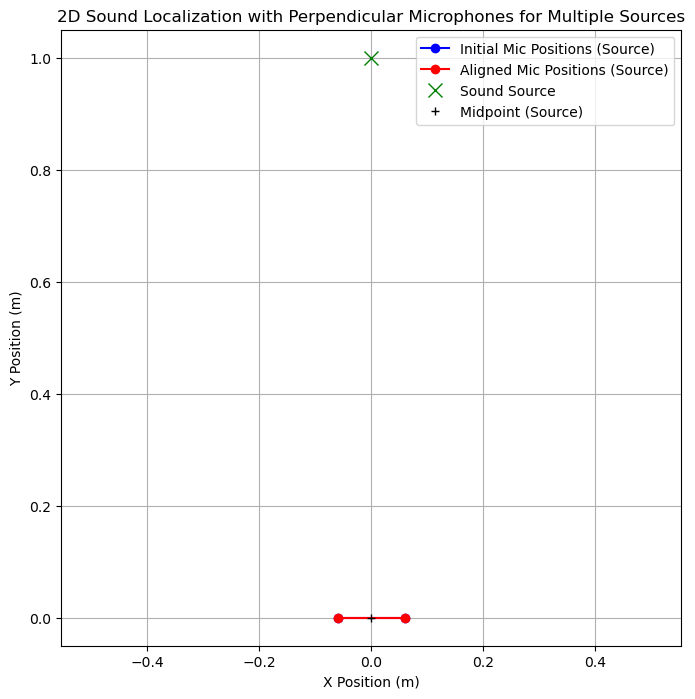

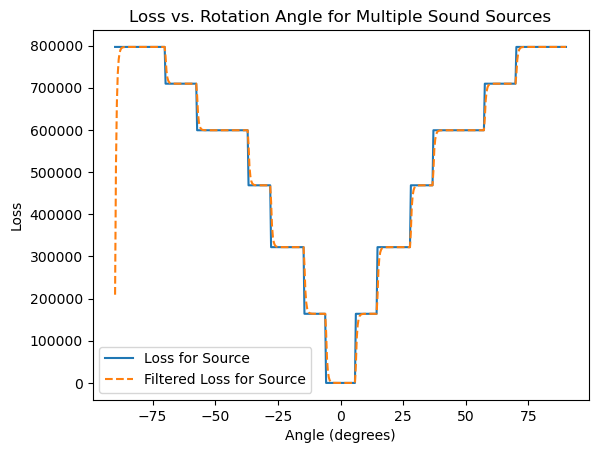

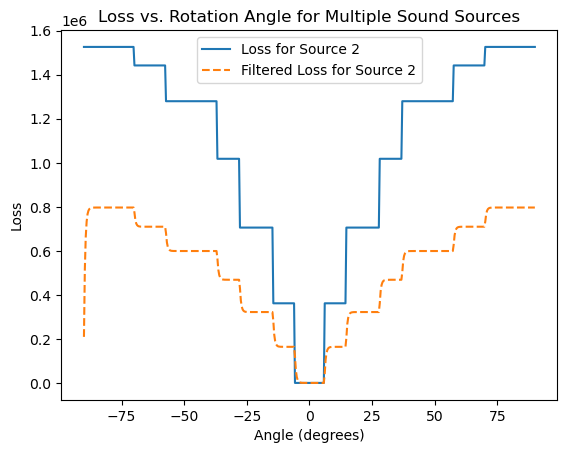

In [65]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from IPython.display import Audio
from scipy import signal

# Microphone positions
mic1_initial = np.array([-0.06, 0])   # Mic 1 at [-1, 0]
mic2_initial = np.array([0.06, 0])    # Mic 2 at [1, 0]
mic_distance = np.linalg.norm(mic2_initial - mic1_initial)  # Distance between microphones
midpoint = (mic1_initial + mic2_initial) / 2  # Midpoint between mic 1 and mic 2

# Load audio file and display it
folder_path = r'Bird_sound'
filename = "call1 (2).wav"
file_path = os.path.join(folder_path, filename)

SR, z = wavfile.read(file_path)
display(Audio(z, rate=SR))

# Sound source positions
sound_source = np.array([0, 1])  # Add multiple sound sources
sound_source_2 = np.array([1, 2])

# Function to rotate microphones
def mic_rotation(angle_to_rotate, sound_source, midpoint):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])

    return mic1_rotated, mic2_rotated

# Calculate and plot microphone rotations for each sound source
plt.figure(figsize=(8, 8))

angle_diff = -np.arctan2(sound_source[0] - midpoint[0], sound_source[1] - midpoint[1])
mic1_rotated, mic2_rotated = mic_rotation(angle_diff, sound_source, midpoint)

# Plot initial and rotated microphone positions
plt.plot([mic1_initial[0], mic2_initial[0]], [mic1_initial[1], mic2_initial[1]], 'bo-', label=f"Initial Mic Positions (Source)")
plt.plot([mic1_rotated[0], mic2_rotated[0]], [mic1_rotated[1], mic2_rotated[1]], 'ro-', label=f"Aligned Mic Positions (Source)")
plt.plot(sound_source[0], sound_source[1], 'gx', label=f"Sound Source", markersize=10)
plt.plot(midpoint[0], midpoint[1], 'k+', label=f"Midpoint (Source)")

plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("2D Sound Localization with Perpendicular Microphones for Multiple Sources")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

def loss_angle(angle_to_rotate, sound_source):
    mic1_rotated, mic2_rotated = mic_rotation(angle_to_rotate, sound_source, midpoint)

    dist_to_mic1 = np.linalg.norm(sound_source - mic1_rotated)
    dist_to_mic2 = np.linalg.norm(sound_source - mic2_rotated)

    t_to_mic1 = dist_to_mic1 / SOUND_SPEED
    t_to_mic2 = dist_to_mic2 / SOUND_SPEED

    samples_at_mic1 = int(t_to_mic1 * SR)
    samples_at_mic2 = int(t_to_mic2 * SR)

    y1 = y[samples_at_mic1:-samples_at_mic2]
    y2 = y[samples_at_mic2:-samples_at_mic1]

    sos = signal.butter(1, 500, 'lp', fs=SR, output='sos')
    y1 = signal.sosfilt(sos, y1)
    y2 = signal.sosfilt(sos, y2)

    loss = np.linalg.norm(y1 - y2)
    return loss

    
# Constants for loss calculation
SOUND_SPEED = 343.2


angles = np.linspace(-np.pi/2, np.pi/2, 501)
loss_sum = np.zeros_like(angles)

plt.figure()

losses = np.array([loss_angle(a, sound_source) for a in angles])
loss_sum += losses
#    loss_sum_array += losses

sos = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
sig = signal.sosfilt(sos, losses)

plt.plot(np.degrees(angles), losses, label=f"Loss for Source")
plt.plot(np.degrees(angles), sig, linestyle='--', label=f"Filtered Loss for Source")

plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Multiple Sound Sources")
plt.legend()
plt.show()

# # Plot the combined loss from both sound sources
# plt.figure()
# sos = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
# loss_sum_filtered = signal.sosfilt(sos, loss_sum)
# plt.plot(np.degrees(angles), loss_sum, label="Combined Loss")
# plt.plot(np.degrees(angles), loss_sum_filtered, linestyle='--', label="Filtered Combined Loss")
# plt.xlabel("Angle (degrees)")
# plt.ylabel("Loss")
# plt.title("Combined Loss vs. Rotation Angle")
# plt.legend()
# plt.show()


filename = "call1 (1).wav"
file_path_2 = os.path.join(folder_path, filename)

SR_2, z_2 = wavfile.read(file_path_2)
display(Audio(z_2, rate=SR_2))

def mic_rotation(angle_to_rotate, sound_source_2, midpoint):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])

    return mic1_rotated, mic2_rotated

def loss_angle_2(angle_to_rotate, sound_source_2):
    mic1_rotated, mic2_rotated = mic_rotation(angle_to_rotate, sound_source, midpoint)

    dist_to_mic1 = np.linalg.norm(sound_source - mic1_rotated)
    dist_to_mic2 = np.linalg.norm(sound_source - mic2_rotated)

    t_to_mic1 = dist_to_mic1 / SOUND_SPEED
    t_to_mic2 = dist_to_mic2 / SOUND_SPEED

    samples_at_mic1_2 = int(t_to_mic1 * SR_2)
    samples_at_mic2_2 = int(t_to_mic2 * SR_2)

    y1_2 = y[samples_at_mic1_2:-samples_at_mic2_2]
    y2_2 = y[samples_at_mic2_2:-samples_at_mic1_2]

    # sos = signal.butter(1, 500, 'lp', fs=SR, output='sos')
    # y1 = signal.sosfilt(sos, y1)
    # y2 = signal.sosfilt(sos, y2)

    loss_2 = np.linalg.norm(y1_2 - y2_2)
    return loss_2

# Constants for loss calculation
SOUND_SPEED = 343.2


# angles = np.linspace(-np.pi/2, np.pi/2, 501)
loss_sum_2 = np.zeros_like(angles)

plt.figure()
losses_2 = np.array([loss_angle_2(a, sound_source_2) for a in angles])
loss_sum_2 += losses
#    loss_sum_array += losses

sos = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
sig = signal.sosfilt(sos, losses)

plt.plot(np.degrees(angles), losses_2, label=f"Loss for Source {i + 1}")
plt.plot(np.degrees(angles), sig, linestyle='--', label=f"Filtered Loss for Source {i + 1}")

plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Multiple Sound Sources")
plt.legend()
plt.show()

# # Plot the combined loss from both sound sources
# plt.figure()
# # sos = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
# # loss_sum_filtered = signal.sosfilt(sos, loss_sum)
# plt.plot(np.degrees(angles), loss_sum_2, label="Combined Loss")
# # plt.plot(np.degrees(angles), loss_sum_filtered, linestyle='--', label="Filtered Combined Loss")
# plt.xlabel("Angle (degrees)")
# plt.ylabel("Loss")
# plt.title("Combined Loss vs. Rotation Angle")
# plt.legend()
# plt.show()


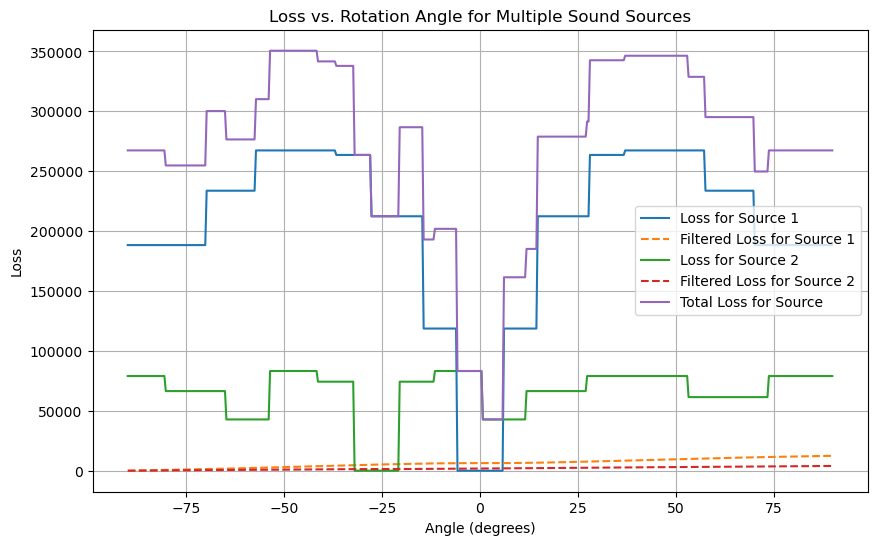

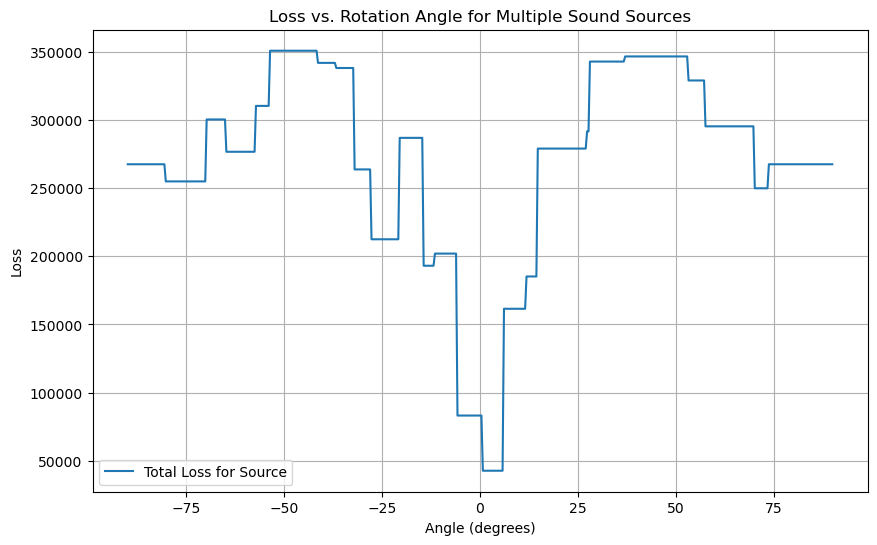

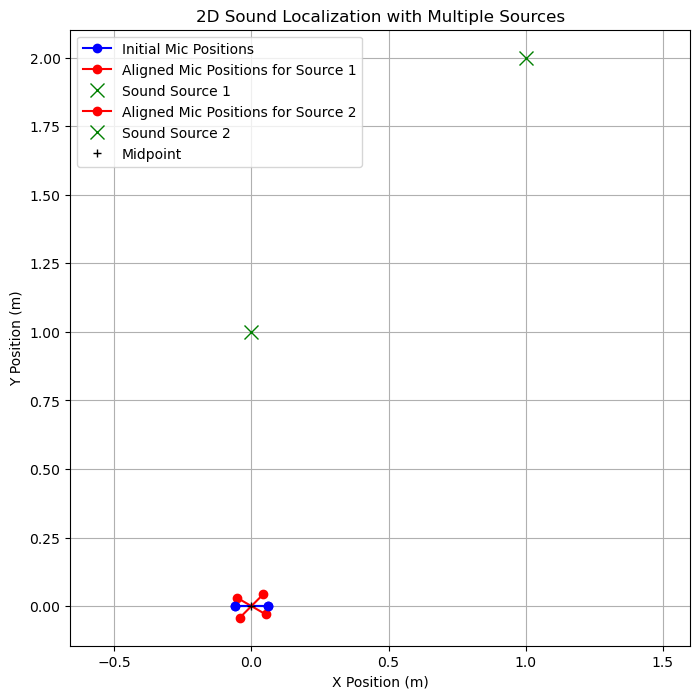

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, sosfilt
from IPython.display import Audio

# Constants
SOUND_SPEED = 343.2

# Microphone positions
mic1_initial = np.array([-0.06, 0])
mic2_initial = np.array([0.06, 0])
mic_distance = np.linalg.norm(mic2_initial - mic1_initial)
midpoint = (mic1_initial + mic2_initial) / 2

# Load audio files
folder_path = r'Bird_sound'
file_1 = "call1 (2).wav"
file_2 = "call1 (1).wav"

file_path_1 = os.path.join(folder_path, file_1)
file_path_2 = os.path.join(folder_path, file_2)

SR_1, z_1 = wavfile.read(file_path_1)
SR_2, z_2 = wavfile.read(file_path_2)

display(Audio(z_1, rate=SR_1))
display(Audio(z_2, rate=SR_2))

# Sound source positions
sound_sources = [
    {"position": np.array([0, 1]), "signal": z_1, "rate": SR_1, "angle": -np.pi / 6},
    {"position": np.array([1, 2]), "signal": z_2, "rate": SR_2, "angle": np.pi / 4},
]

# Functions
def mic_rotation(angle_to_rotate, midpoint, mic_distance):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    return mic1_rotated, mic2_rotated

def loss_angle(angle_to_rotate, sound_source):
    mic1_rotated, mic2_rotated = mic_rotation(angle_to_rotate, midpoint, mic_distance)
    dist_to_mic1 = np.linalg.norm(sound_source["position"] - mic1_rotated)
    dist_to_mic2 = np.linalg.norm(sound_source["position"] - mic2_rotated)

    t_to_mic1 = dist_to_mic1 / SOUND_SPEED
    t_to_mic2 = dist_to_mic2 / SOUND_SPEED

    samples_at_mic1 = int(t_to_mic1 * sound_source["rate"])
    samples_at_mic2 = int(t_to_mic2 * sound_source["rate"])

    signal = sound_source["signal"]
    y1 = signal[samples_at_mic1:len(signal) - samples_at_mic2]
    y2 = signal[samples_at_mic2:len(signal) - samples_at_mic1]

    sos = butter(1, 500, 'lp', fs=sound_source["rate"], output='sos')
    y1 = sosfilt(sos, y1)
    y2 = sosfilt(sos, y2)

    loss = np.linalg.norm(y1 - y2)
    return loss

# Process each sound source
angles = np.linspace(-np.pi / 2, np.pi / 2, 501)
plt.figure(figsize=(10, 6))

T_loss = np.zeros_like(angles)

for i, source in enumerate(sound_sources):
    losses = np.array([loss_angle(a, source) for a in angles])
    T_loss += losses

    # Apply filtering to smooth the loss curve
    sos = butter(1, 0.01, 'lp', fs=len(angles), output='sos')
    filtered_losses = sosfilt(sos, losses)

    # Plot loss vs. angle
    plt.plot(np.degrees(angles), losses, label=f"Loss for Source {i + 1}")
    plt.plot(np.degrees(angles), filtered_losses, linestyle='--', label=f"Filtered Loss for Source {i + 1}")

plt.plot(np.degrees(angles), T_loss, label=f"Total Loss for Source")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Multiple Sound Sources")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.degrees(angles), T_loss, label=f"Total Loss for Source")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Multiple Sound Sources")
plt.legend()
plt.grid(True)
plt.show()

# Visualize microphone alignment for both sources
plt.figure(figsize=(8, 8))

for i, source in enumerate(sound_sources):
    angle = source["angle"]
    mic1_rotated, mic2_rotated = mic_rotation(angle, midpoint, mic_distance)

    plt.plot([mic1_initial[0], mic2_initial[0]], [mic1_initial[1], mic2_initial[1]], 'bo-', label="Initial Mic Positions" if i == 0 else "")
    plt.plot([mic1_rotated[0], mic2_rotated[0]], [mic1_rotated[1], mic2_rotated[1]], 'ro-', label=f"Aligned Mic Positions for Source {i + 1}")
    plt.plot(source["position"][0], source["position"][1], 'gx', label=f"Sound Source {i + 1}", markersize=10)

plt.plot(midpoint[0], midpoint[1], 'k+', label="Midpoint")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("2D Sound Localization with Multiple Sources")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
